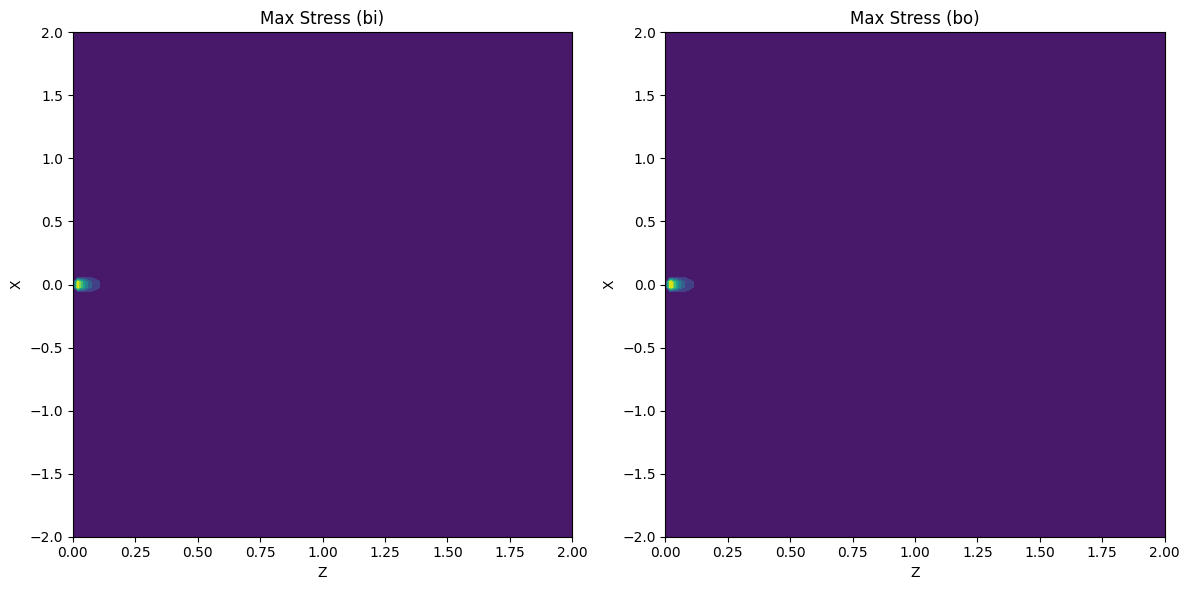

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
bi = 1.178e-4
bo = 1.4024e-4
v = 0.3

# Define the function to calculate max stress
def max_stress(Z, X):
    C1 = (1 + X)**2 + Z**2
    C2 = (1 - X)**2 + Z**2
    psi = (np.pi / C1) * (1 - np.sqrt(C2 / C1)) / (np.sqrt(C2 / C1) * (np.sqrt(2 * np.sqrt(C2 / C1) + (C1 + C2 - 4) / C1)))
    psi_bar = (np.pi / C1) * (1 + np.sqrt(C2 / C1)) / (np.sqrt(C2 / C1) * (np.sqrt(2 * np.sqrt(C2 / C1) + (C1 + C2 - 4) / C1)))
    sigma_zz = (-Z / np.pi) * (psi_bar - X * psi)
    sigma_xx = (-Z / np.pi) * (psi_bar * (1 + 2 * X**2 + 2 * Z**2) - 2 * np.pi - 3 * X * psi)
    sigma_yy = v * (sigma_xx + sigma_zz)
    sigma_xz = (-Z**2 * psi) / np.pi
    sigma_VM = (1/6) * ((sigma_xx - sigma_yy)**2 + (sigma_xx - sigma_zz)**2 + (sigma_yy - sigma_zz)**2) + (sigma_xz)**2
    return sigma_VM

# Create a meshgrid for Z and X
Z_values = np.linspace(0, 2, 100)
X_values = np.linspace(-2, 2, 100)
Z_mesh, X_mesh = np.meshgrid(Z_values, X_values)

# Calculate max stress for each point in the meshgrid
max_stress_values_bi = max_stress(Z_mesh / bi, X_mesh / bi)
max_stress_values_bo = max_stress(Z_mesh / bo, X_mesh / bo)

# Plot the curves
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.contourf(Z_mesh, X_mesh, max_stress_values_bi, cmap='viridis')
plt.title('Max Stress (bi)')
plt.xlabel('Z')
plt.ylabel('X')

plt.subplot(1, 2, 2)
plt.contourf(Z_mesh, X_mesh, max_stress_values_bo, cmap='viridis')
plt.title('Max Stress (bo)')
plt.xlabel('Z')
plt.ylabel('X')

plt.tight_layout()
plt.show()
